# Blue Book for Bulldozers
## Predicting the sale price of Bulldozers using machine learning

In this notebook I will predict the sale price of bulldozers using hiatorical data of bulldozers

## 1. Problem definitin 
> How well can we predict the future sale price of a bulldozer at auction, given  it's characteristics and previous examples of bulldozers sold at auction   

## 2. Data
The data is downloaded from kaggle under the 'Blue Book for Bulldozers: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

There are three main data sets. 
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluatun of this project check: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview 

Note: the goal is to build a machine learning model that minimizes the RMSLE
## 4. Features

Data Dictionary is available on Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import train and validation sets
df = pd.read_csv('Data/TrainAndValid.csv',
                low_memory=False)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

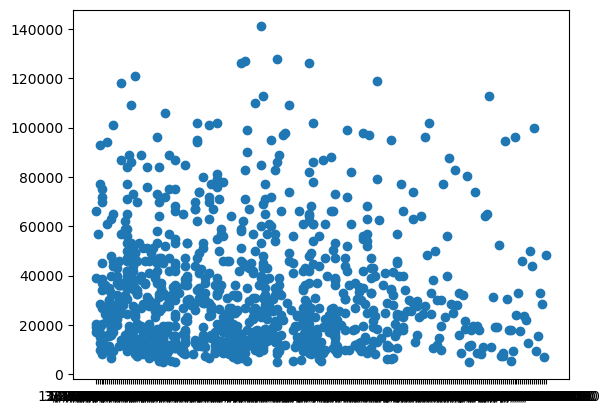

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [6]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

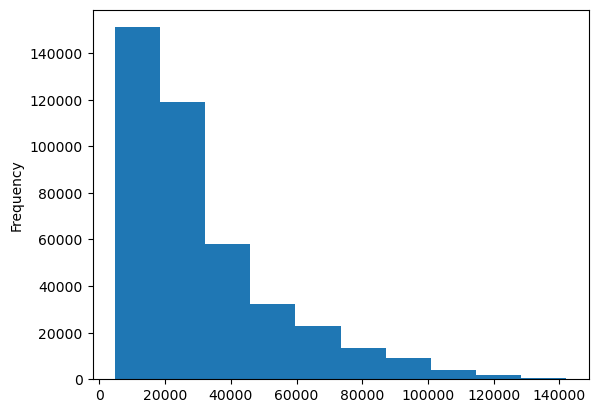

In [7]:
df.SalePrice.plot.hist();

### Parsing dates

When working with time series data we want to enrich the time and date as much as possible. 

We can do that by telling pandas which columns have dates in them using the  `parse_dates` Parameter

In [8]:
# import data again but this time parse the dates

df = pd.read_csv('Data/TrainAndValid.csv',
                low_memory=False,
                parse_dates=['saledate'])

In [9]:
df['saledate'].dtype

dtype('<M8[ns]')

In [10]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

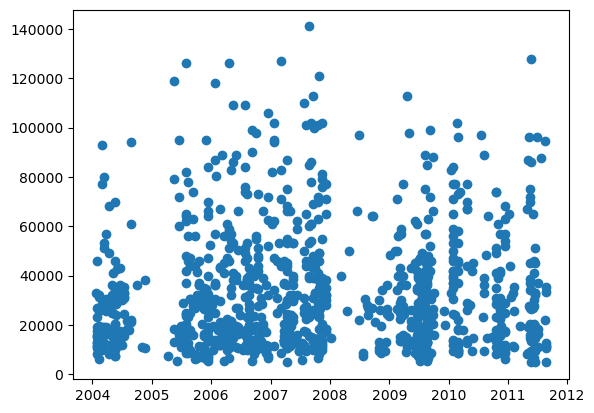

In [11]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['auctioneerID'].unique(), df['auctioneerID'].nunique()

(array([ 3.,  1.,  2., 11.,  4.,  7., 99.,  6.,  5., 18., 17., 22., 20.,
        14., 16., 21.,  9., 13., 12., 23., 10., 15., 19.,  8., 28., 25.,
        27., 24., nan,  0., 26.]),
 30)

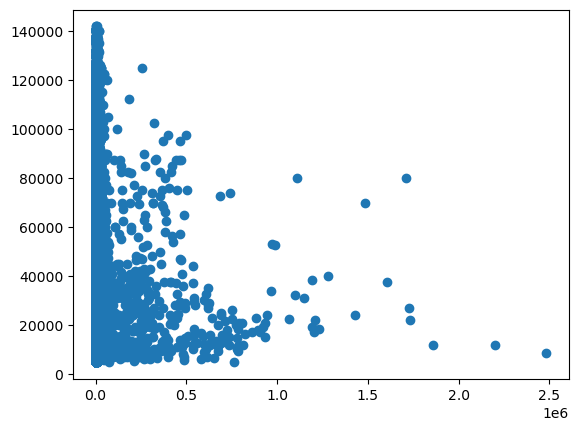

In [14]:
fig, ax = plt.subplots()
ax.scatter(df['MachineHoursCurrentMeter'],df['SalePrice']);

In [15]:
df['YearMade'].unique()

array([2004, 1996, 2001, 2007, 1993, 2008, 1000, 1998, 1999, 2003, 1991,
       2000, 2005, 1995, 2006, 2002, 1984, 1988, 1980, 1992, 1987, 1997,
       1971, 1978, 1989, 1985, 1979, 1976, 1994, 1982, 1990, 1974, 1968,
       1966, 1983, 1986, 1981, 1970, 1977, 1975, 1973, 1965, 1967, 2009,
       2010, 1969, 1972, 1964, 1957, 1958, 1963, 1919, 1920, 1950, 1948,
       1952, 1942, 1956, 1954, 1953, 1955, 1959, 1960, 1961, 1962, 1951,
       1937, 1949, 1947, 2012, 2013, 2011, 2014])

In [16]:
df['YearMade'].value_counts()[1000]

39391

In [17]:
df2 = df[df.YearMade != 1000]

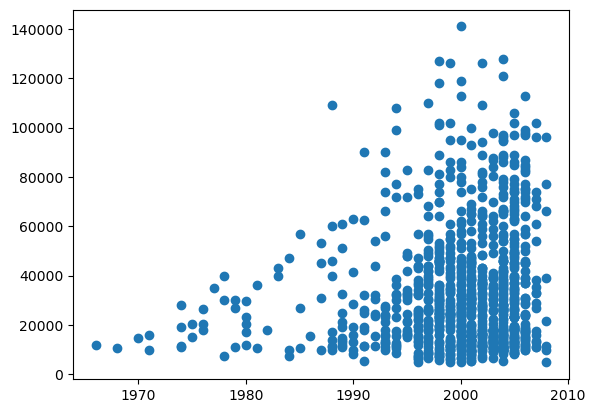

In [18]:
fig, ax = plt.subplots()
ax.scatter(df2['YearMade'][:1000], df2['SalePrice'][:1000]);

In [19]:
df['UsageBand'].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [20]:
#This won't work because there are many columns that aren't numerical
#fig, ax = plt.subplots()
#ax.bar(df['UsageBand'],df['SalePrice']);

In [21]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [22]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort dataFrame by saledate

WHen working with time series data, it is a good idea to sort by date

In [23]:
# sort DataFrame in date order
df.sort_values(by=('saledate'), inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### make copy of the original data frame
We make a copy of the original data frame so when we manipulate the data we still have to original data`

In [24]:
df_temp = df.copy()

In [25]:
df_temp.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### add datetime parameters for `saledate` column

In [26]:
df_temp["SaleYear"] = df_temp.saledate.dt.year
df_temp['SaleMonth'] = df_temp.saledate.dt.month
df_temp['SaleDay'] = df_temp.saledate.dt.day
df_temp['SaleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['SaleDayOfYear'] = df_temp.saledate.dt.dayofyear
df_temp['SaleQuarter'] = df_temp.saledate.dt.quarter

In [27]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [28]:
# Now we enriched the dataframe with date time features we can remove the saledate feature
df_temp.drop('saledate', axis=1, inplace=True)

In [29]:
#Check values of different columns
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modeling 

After some EDA (more can always be done later) Let's do some model driven EDA

In [30]:
# # lets build a machine learning model 
# from sklearn.ensemble import RandomForestRegressor

# Model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42)
# Model.fit(df_temp.drop('SalePrice', axis = 1), df_temp["SalePrice"])

In [31]:
df_temp['UsageBand'].dtype

dtype('O')

In [32]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert strings to categories 

One way to turn all data into numbers in by converting them to pandas categories 
We can check for them here https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html 

In [33]:
pd.api.types.is_object_dtype(df_temp['UsageBand'])

True

In [34]:
# find the columns which contain strings 
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
# df.items() example
random_dict = {'key1': 'Hello', 
              'key2': 'world!'}
for key, value in random_dict.items():
    print(f"this is a key: {key}",
          f"this is a value: {value}")

this is a key: key1 this is a value: Hello
this is a key: key2 this is a value: world!


In [36]:
# this will turn all of the objects into categories (this can take strings to categories as well)
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [37]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [38]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [39]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [40]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks tp pandas categories we now have a way to access all of our data in the form of numbers. 

But we still have a bunch of missing data

In [41]:
# check missing values
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### save preprocessed data

In [42]:
# export current tmo dataframe
df_temp.to_csv('data/train_temp.csv',
              index=False)

In [43]:
#import preprocessed data 
df_tmp = pd.read_csv('data/train_temp.csv',
                    low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [44]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values 

### Fill numeric missing values first

In [45]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear
SaleQuarter


In [46]:
# check which numeric columns have null values.
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        

auctioneerID
MachineHoursCurrentMeter


In [47]:
#fill numeric rows with median
#come back later and try just `MachineHoursCurrentMeter` as median and make unknown for `auctioneerID`
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add bunary column to tell us if data was missing
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            #fill the numeric with median
            df_tmp[label] = content.fillna(content.median())
        

In [48]:
# check if there are null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        else: print(label + ' = No missing values')

SalesID = No missing values
SalePrice = No missing values
MachineID = No missing values
ModelID = No missing values
datasource = No missing values
auctioneerID = No missing values
YearMade = No missing values
MachineHoursCurrentMeter = No missing values
SaleYear = No missing values
SaleMonth = No missing values
SaleDay = No missing values
SaleDayOfWeek = No missing values
SaleDayOfYear = No missing values
SaleQuarter = No missing values
auctioneerID_is_missing = No missing values
MachineHoursCurrentMeter_is_missing = No missing values


In [49]:
# Check to see how many values were missing
df_tmp.auctioneerID_is_missing.value_counts()


auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [50]:
pd.options.display.max_rows = 110

In [51]:
df_tmp.isnull().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variable into numbers 

In [52]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if content.isnull().sum():
            print(label)
    

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [53]:
#turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #add binary column for missing = True or False
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # turn categorigories into numbers and add +1 this makes missing values worth 0 not -1
        df_tmp[label] = pd.Categorical(content).codes+1

In [54]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [55]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 104 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(11), int8(40)
memory usage: 81.1 MB


In [56]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119


In [57]:
df_tmp.isna().sum()

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
MachineHoursCurrentMeter               0
UsageBand                              0
fiModelDesc                            0
fiBaseModel                            0
fiSecondaryDesc                        0
fiModelSeries                          0
fiModelDescriptor                      0
ProductSize                            0
fiProductClassDesc                     0
state                                  0
ProductGroup                           0
ProductGroupDesc                       0
Drive_System                           0
Enclosure                              0
Forks                                  0
Pad_Type                               0
Ride_Control                           0
Stick           

Now all data is numeric and no missing values a machine learning model should work now

In [58]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
# %%time this is blocked out to save time
# # instantiate a model 

# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42)
# # fit the model
# model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

In [61]:
# %%time
# # score the model 
# model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

This is unreliable because it is scored on the same data it was trained on

## Split data into train and validation sets

In [62]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [63]:
df_tmp.SaleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: SaleYear, Length: 412698, dtype: int64

In [64]:
df_tmp.SaleYear.value_counts()

SaleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [65]:
# split data into train and validation set
df_valid = df_tmp[df_tmp.SaleYear == 2012]
df_train = df_tmp[df_tmp.SaleYear != 2012]

In [66]:
len(df_train), len(df_valid)

(401125, 11573)

In [67]:
# Split data into x and y
x_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
x_valid, y_valid = df_valid.drop('SalePrice', axis=1), df_valid.SalePrice

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 103), (401125,), (11573, 103), (11573,))

In [68]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Build an Evaluation function 

In [69]:
# Create evaluation function (the competion uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test,y_preds):
    """
    Calculate the root mean squared log error between predictions and true labels. 
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
# Create function to evaluate model on a few different levels 
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {'Trainiing MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid,val_preds),
             'Training RMSLE': rmsle(y_train,train_preds),
             'Valid RMSLE': rmsle(y_valid,val_preds),
             'Training R^2': r2_score(y_train, train_preds),
             'Valid r^2': r2_score(y_valid,val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

this will reduce the time to run experiments

In [70]:
#Takes too long 
# model = RandomForestRegressor(n_jobs=-1,
#                              Random_state=42)

# model.fit(x_train,y_train)

In [71]:
len(x_train)

401125

In [72]:
#Change max_samples value
model = RandomForestRegressor(n_jobs= -1,
                             random_state=42,
                             max_samples=10000)

In [73]:
%%time
#reducing the max number of samples each estimator uses might improve training time
model.fit(x_train,y_train)

CPU times: user 43.9 s, sys: 725 ms, total: 44.6 s
Wall time: 15.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [74]:
show_scores(model)

{'Trainiing MAE': 5563.799934409475,
 'Valid MAE': 7176.101590771623,
 'Training RMSLE': 0.25787435489830485,
 'Valid RMSLE': 0.293254144429854,
 'Training R^2': 0.8605783893618949,
 'Valid r^2': 0.8318363048880117}

### hyperparameter tuning with RandomizedSearchCV

In [75]:
# %%time 
# from sklearn.model_selection import RandomizedSearchCV

# # Different RandomForestRegressor hyperparameters
# rf_grid = {'n_estimators': np.arange(10,100,10),
#           'max_depth': [None, 3,5,10],
#           'min_samples_split': np.arange(2,20,2),
#           'min_samples_leaf': np.arange(1,20,2),
#           'max_features': [0.5,1, 'sqrt', 'auto'],
#           'max_samples': [10000]}

# # Instantiate RandomizedSearchCV model
# rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
#                                                   random_state=42),
#                             param_distributions=rf_grid,
#                             n_iter=20,
#                             cv=5,
#                             verbose=True)
# # Fit the RandomizedSearchCV
# rs_model.fit(x_train,y_train)

In [76]:
# # Find the best model parameters
# rs_model.best_params_

In [77]:
# # evaluate the RandomizedSearch model 
# show_scores(rs_model)

### Train the model with the best hyperparameters 

**Note:** These were found after 100 iterations of `RandomizedSearchCV`

In [78]:
%%time 

# Most ideal hyperparameters 
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None)
# FIt the ideal model
ideal_model.fit(x_train,y_train)

CPU times: user 3min 31s, sys: 2.68 s, total: 3min 34s
Wall time: 1min 14s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [79]:
#scores for ideal_model (ran on all the data)
show_scores(ideal_model)

{'Trainiing MAE': 2963.4865354981225,
 'Valid MAE': 5991.627805739415,
 'Training RMSLE': 0.1449841585630013,
 'Valid RMSLE': 0.24741708904324067,
 'Training R^2': 0.9585858886600688,
 'Valid r^2': 0.8809048979791445}

In [80]:
# #Scores for rs_model (only ~10,000 examples)
# show_scores(rs_model)

## Make predictins on test data 

In [81]:
#import test data 
df_test = pd.read_csv('data/Test.csv',
                     low_memory=False,
                     parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [82]:
# #make predictions on the test data set (this wont work becuase it hasn't been manipulated yet)
# test_preds = ideal_model.predict(df_test)

In [83]:
df_test.info

<bound method DataFrame.info of        SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0      1227829    1006309     3168         121             3      1999   
1      1227844    1022817     7271         121             3      1000   
2      1227847    1031560    22805         121             3      2004   
3      1227848      56204     1269         121             3      2006   
4      1227863    1053887    22312         121             3      2005   
...        ...        ...      ...         ...           ...       ...   
12452  6643171    2558317    21450         149             2      2008   
12453  6643173    2558332    21434         149             2      2005   
12454  6643184    2558342    21437         149             2      1000   
12455  6643186    2558343    21437         149             2      2006   
12456  6643196    2558346    21446         149             2      2008   

       MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
0     

In [84]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

### preprocessing the data
##get the test dataset into the same format as the training data set 


In [86]:
def preprocess_data(df):
    """
    Perfoms transformations on df and returns transformed df
    """
    #extract sale date info
    df["SaleYear"] = df.saledate.dt.year
    df['SaleMonth'] = df.saledate.dt.month
    df['SaleDay'] = df.saledate.dt.day
    df['SaleDayOfWeek'] = df.saledate.dt.dayofweek
    df['SaleDayOfYear'] = df.saledate.dt.dayofyear
    df['SaleQuarter'] = df.saledate.dt.quarter
    
    #drop the sale date column
    df.drop('saledate',axis=1,inplace=True)
    
    #fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #add binary column to tell us if data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                #fill the numeric with median
                df[label] = content.fillna(content.median())
    
            #fill categorical missing data and turned these categories into numbers 
        if not pd.api.types.is_numeric_dtype(content):
            #add binary column for missing = True or False
            df[label+'_is_missing'] = pd.isnull(content)
            # turn categorigories into numbers and add +1 this makes missing values worth 0 not -1
            df[label] = pd.Categorical(content).codes+1
    
    
    return df

In [87]:
df_test_processed = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [88]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [89]:
# #make predictions on updated df
# test_preds = ideal_model.predict(df_test)

In [90]:
# we can find how the coulumns differ using sets
set(x_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [91]:
#manually adjust test_df to add 'auctioneerID_is_missing' column
df_test.insert(57,'auctioneerID_is_missing',False)


Finnally our test data frame has the same features as train df we can make predictions 

In [92]:
idx=df_train.columns.get_loc('auctioneerID_is_missing')
print("Column Index : "+ str(idx))

Column Index : 58


In [93]:
# col = df_test.pop('auctioneerID_is_missing')
# df_test = df_test.insert(58,auctioneerID_is_missing,col)

In [94]:
df_train.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119


In [95]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,2,1,3,1,2
fiModelDesc,499,831,1177,287,566
fiBaseModel,180,292,404,113,196


In [96]:
test_preds = ideal_model.predict(df_test)

In [97]:
test_preds

array([17633.2256924 , 17183.58023706, 49607.20960919, ...,
       13586.66515862, 18616.86616437, 29186.92126686])

In [98]:
# Format predictions into the same format as kaggle 
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17633.225692
1,1227844,17183.580237
2,1227847,49607.209609
3,1227848,65658.100503
4,1227863,58194.217468
...,...,...
12452,6643171,37567.317969
12453,6643173,11304.937952
12454,6643184,13586.665159
12455,6643186,18616.866164


In [99]:
# export prediction data 
df_preds.to_csv('data/bluebook_test_predictions.csv',index=False)

### Feature importance

Which attributes are most important in predicting the target variable

In [100]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.40295778e-02, 1.85838539e-02, 4.08462546e-02, 1.84735166e-03,
       3.26338785e-03, 2.04961478e-01, 3.12475871e-03, 9.73947599e-04,
       3.80116577e-02, 5.54474815e-02, 6.40261282e-02, 4.38750976e-03,
       1.04840132e-02, 1.59320147e-01, 4.16818740e-02, 5.86090618e-03,
       1.76229415e-03, 2.89696388e-03, 3.94995871e-03, 8.09363855e-02,
       8.24449079e-04, 7.10358730e-05, 9.51958852e-04, 1.37096210e-04,
       1.65761850e-03, 2.30271329e-05, 2.00820444e-03, 4.37772213e-03,
       2.65565294e-03, 1.20032266e-04, 3.19085573e-03, 4.68112700e-03,
       4.94602888e-03, 1.59717244e-03, 2.24599002e-03, 6.84408687e-03,
       8.66609854e-04, 8.28726623e-03, 7.86364964e-06, 2.38568969e-03,
       2.33629640e-03, 9.39056648e-04, 1.97613353e-03, 5.55480023e-04,
       4.32955382e-04, 3.30300591e-04, 5.17990121e-04, 1.81071762e-03,
       9.09787984e-04, 2.33193358e-04, 1.92542075e-04, 7.23241106e-02,
       3.37012817e-03, 5.60199831e-03, 2.90325454e-03, 9.41022903e-03,
      

In [117]:
# Helper function for plotting feature importance 
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({'Features': columns,
                       'feature_importances': importances})
         .sort_values('feature_importances',ascending=False)
    .reset_index(drop=True))
    
    #Plot the dataframe
    fig,ax = plt.subplots()
    ax.barh(df['Features'][:20],df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.set_title('Feature Importance in Price Prediction of Bulldozers')
    ax.invert_yaxis()

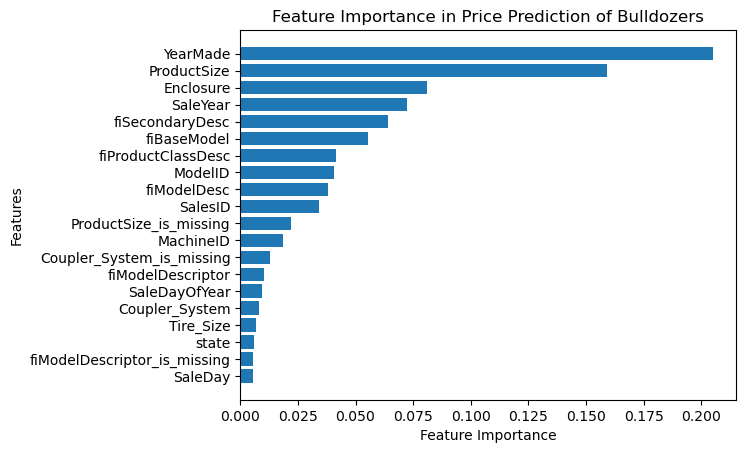

In [118]:
plot_features(x_train.columns, ideal_model.feature_importances_)